In [1]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
Tel_Glu <- readRDS('/data/work/seurat_integrated/10_budgerigar_Tel_Glu.rds')
Tel_Glu

An object of class Seurat 
18448 features across 115824 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [ ]:
Tel_Glu

In [ ]:
Idents(Tel_Glu) <- Tel_Glu$`Sample_ID`

In [ ]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(Tel_Glu, split.by = "Sample_ID")

# NormalizeData FindVariableFeatures
for (name in names(budgerigar_brain_obj_list)) {
    
    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

In [ ]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [ ]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")

# 整合数据
Tel_Glu <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

In [ ]:
# Scale data (default: only for variable features)
variable_feature <- rownames(Tel_Glu)

In [ ]:
Tel_Glu <- ScaleData(Tel_Glu, features = variable_feature, vars.to.regress = c("nCount_RNA"))

In [ ]:
saveRDS(Tel_Glu, file = '/data/work/5month_Tel/10_budgerigar_brain_5months_Tel_Glu.rds')

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(Tel_Glu) <- "integrated"

# PCA

Tel_Glu <- RunPCA(Tel_Glu, assay = "integrated", verbose = T) 

In [ ]:
Tel_Glu <- FindNeighbors(Tel_Glu, dims = 1:40, reduction = "pca")

In [ ]:
saveRDS(Tel_Glu, file = '/data/work/5month_Tel/10_budgerigar_brain_5months_Tel_Glu_unannotated.rds')

In [ ]:
library(Seurat)
library(clustree)
library(dplyr)

Tel_Glu <- RunUMAP(Tel_Glu, dims = 1:40, verbose = TRUE)

cluster_results <- list()


for (i in c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10)) {

  Tel_Glu <- FindClusters(Tel_Glu, resolution = i)
  
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("Glu_", res_col_name)
  colnames(Tel_Glu@meta.data)[colnames(Tel_Glu@meta.data) == res_col_name] <- new_col_name

  cluster_results[[paste0("resolution_", i)]] <- Tel_Glu
  
  plot <- DimPlot(Tel_Glu, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [2]:
Tel_Glu <- readRDS('/data/work/5month_Tel/10_budgerigar_brain_5months_Tel_Glu_annotated.rds')

In [7]:
options(repr.plot.width = 12, repr.plot.height = 11)

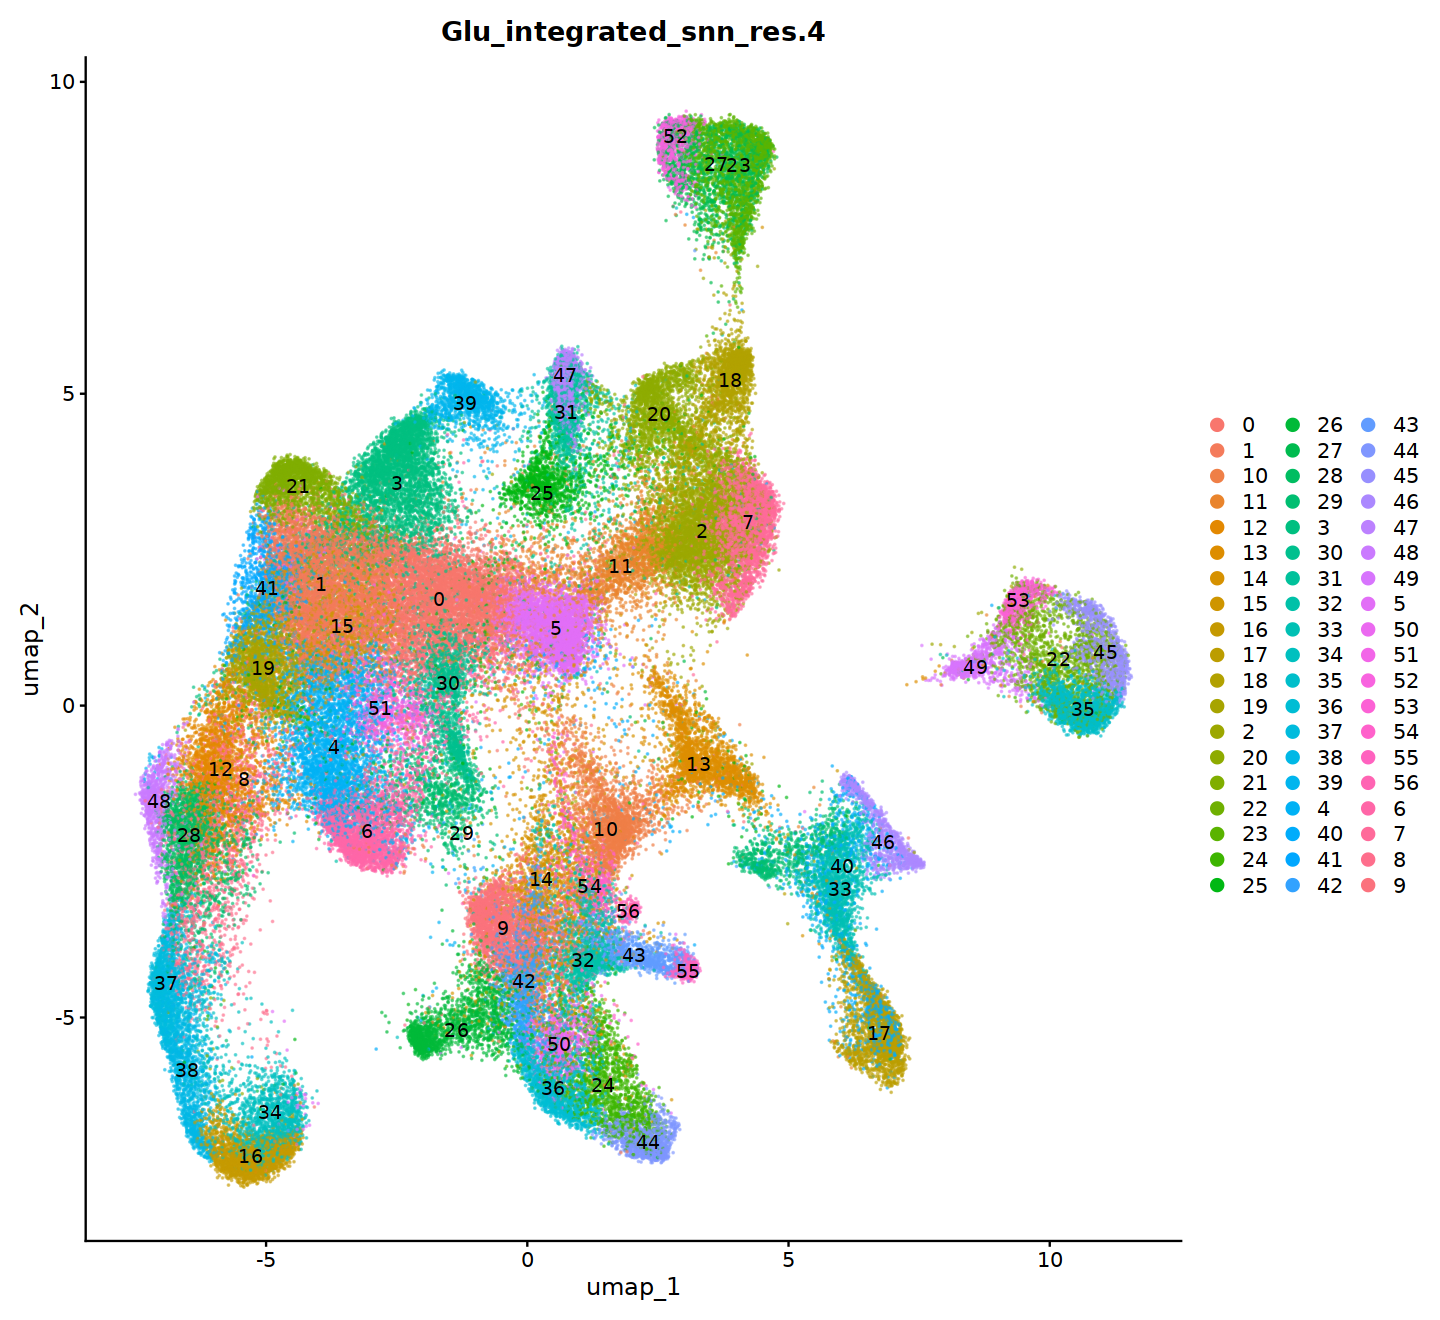

In [13]:
DimPlot(Tel_Glu, label = TRUE, reduction = "umap",raster=FALSE,group.by ="Glu_integrated_snn_res.4",alpha =0.5)
ggsave("/data/work/5month_Tel/Glu/Glu_integrated_snn_res.4.png", width = 12, height = 11)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



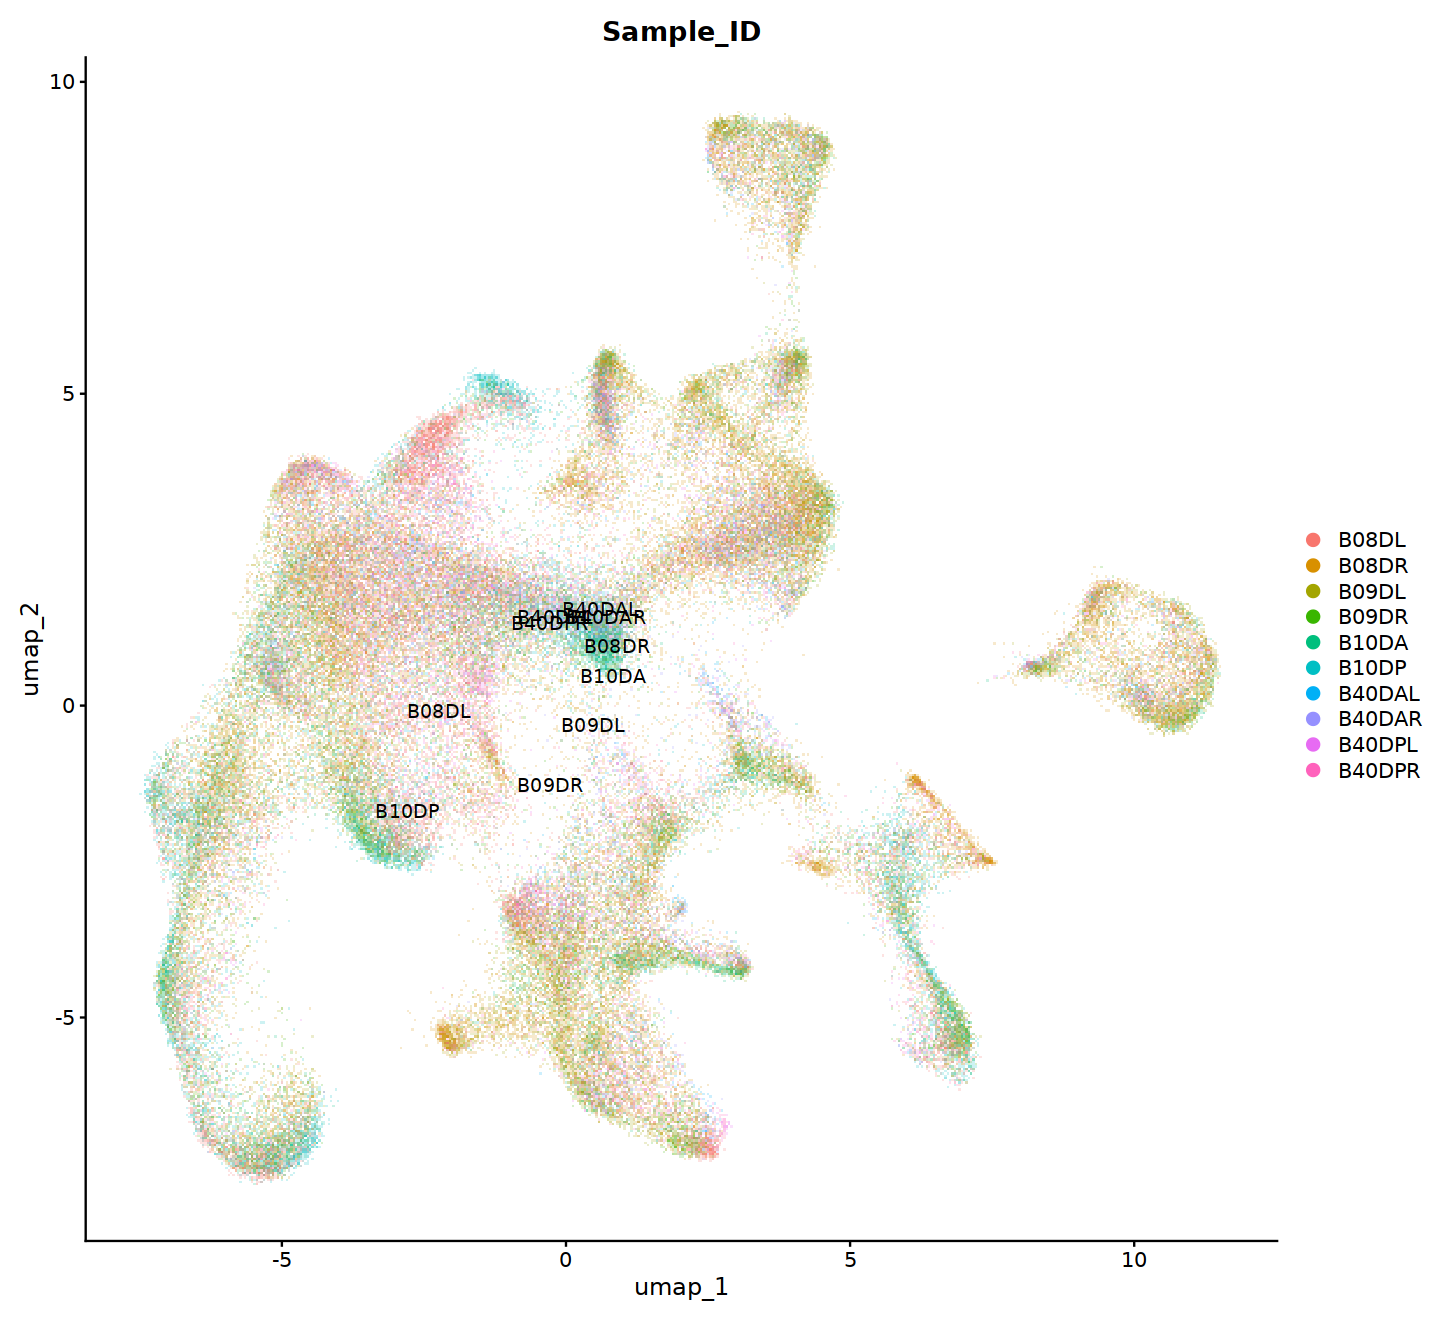

In [15]:
DimPlot(Tel_Glu, label = TRUE, reduction = "umap",raster=TRUE,group.by ="Sample_ID", alpha = 0.2)
ggsave("/data/work/5month_Tel/Glu/Glu_Sample_ID.pdf", width = 12, height = 12)